In [1]:
import pandas as pd
import numpy as np
from lib.eda_funcs import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red_df = pd.read_csv(r"..\data\winequality-red.csv", sep=";")
white_df = pd.read_csv(r"..\data\winequality-white.csv", sep=";")

red_df["color"] = "red"
white_df["color"] = "white"

df = pd.concat([red_df, white_df], axis=0)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [3]:
print(df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [5]:
print(percent_of_na(df))

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
color                   0.0
dtype: float64


In [6]:
df = onehot(df, ["color"])

In [7]:
print(df.duplicated().sum())

1177


In [8]:
df.drop_duplicates(keep="last", inplace=True)

In [9]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000         

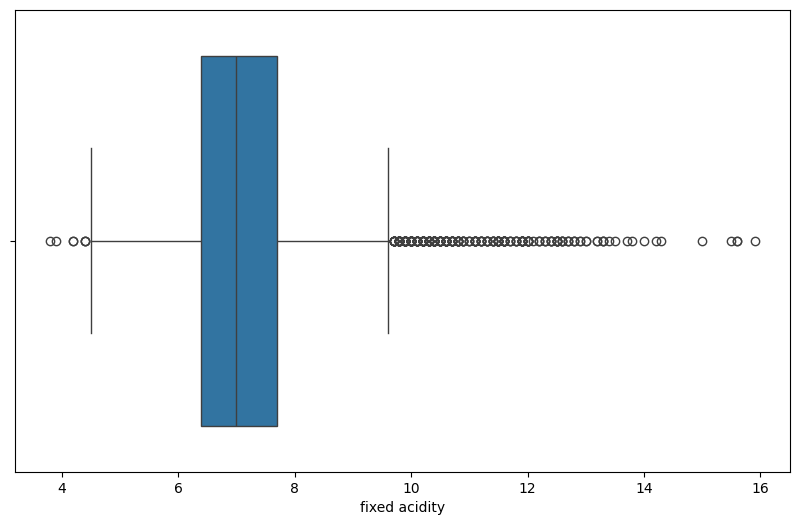

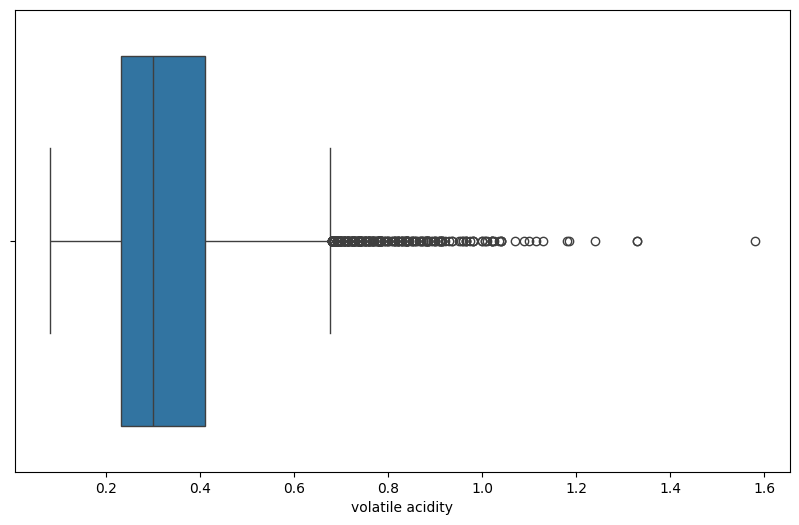

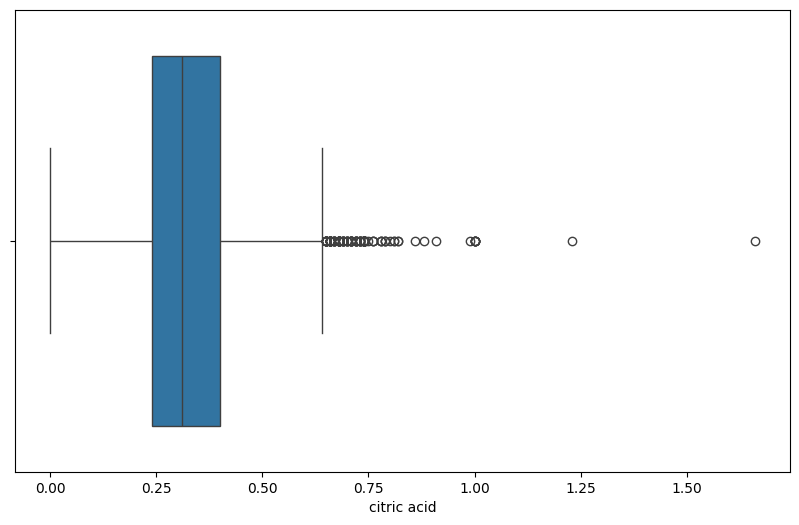

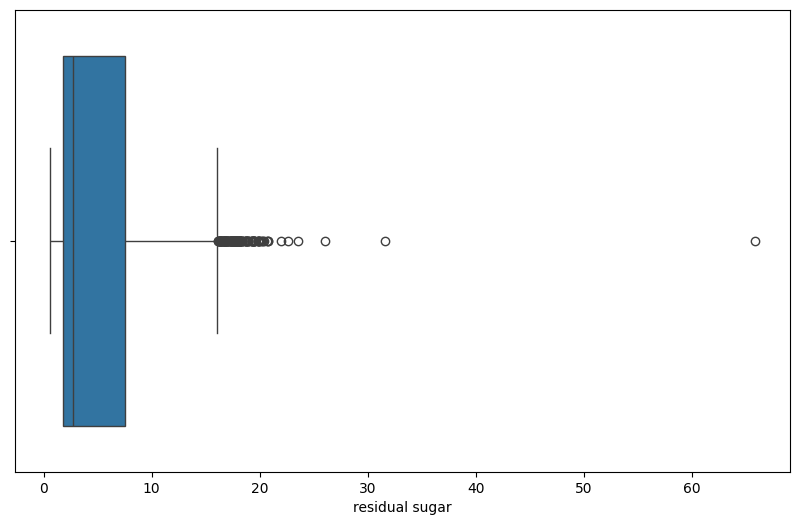

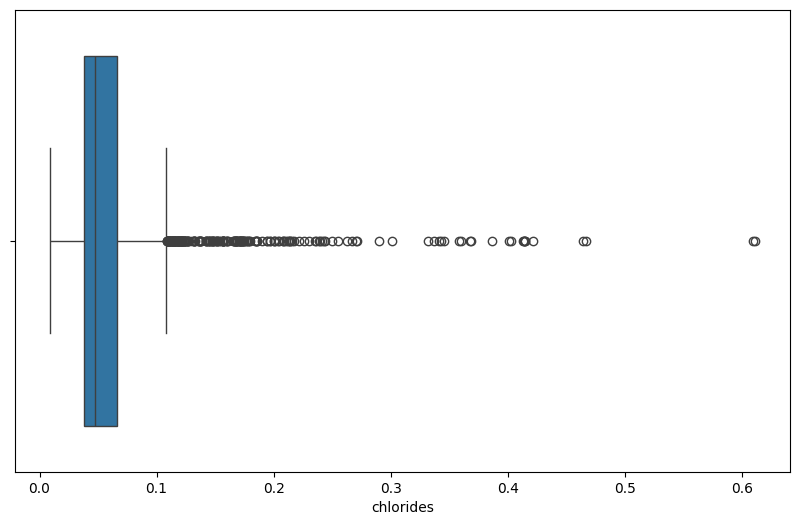

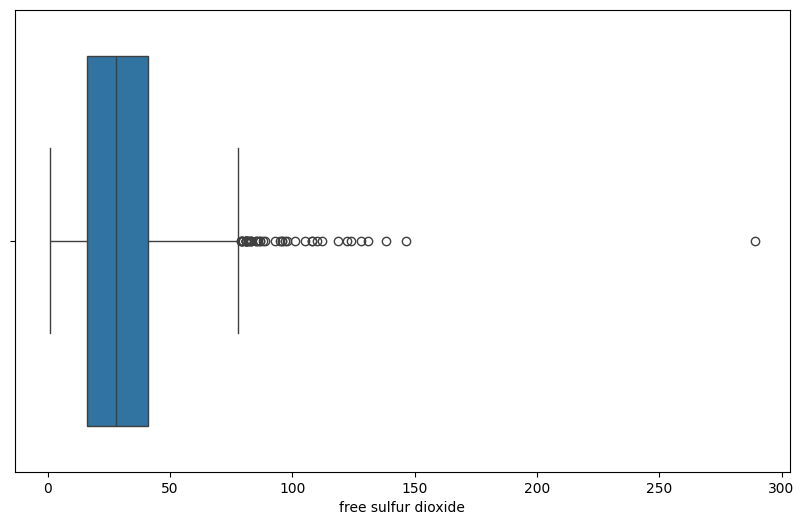

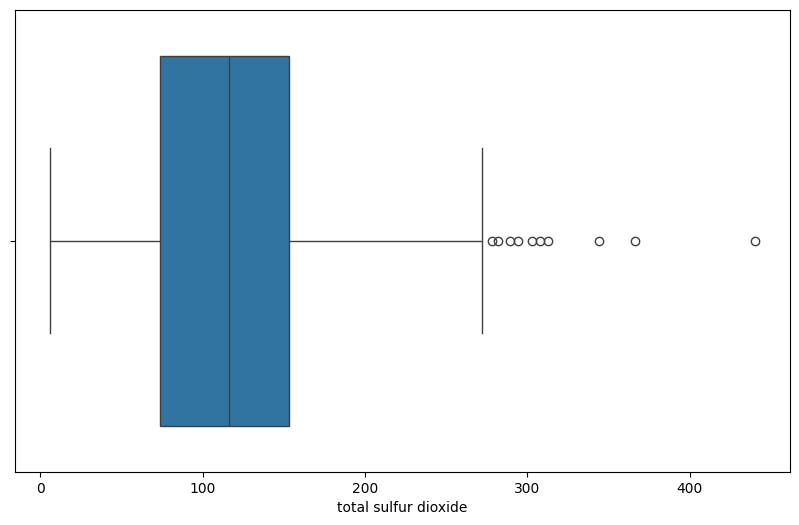

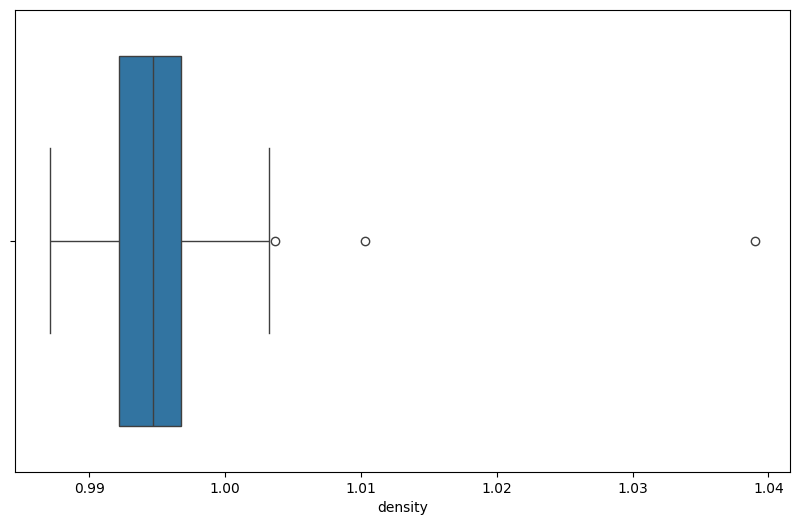

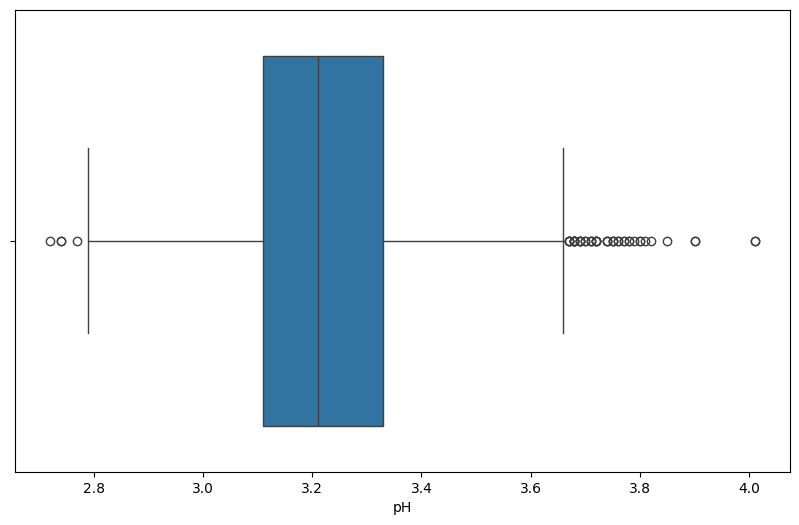

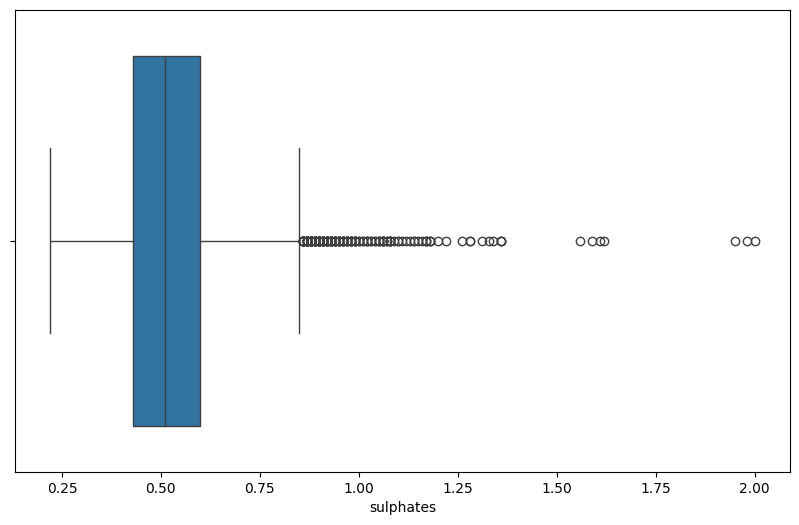

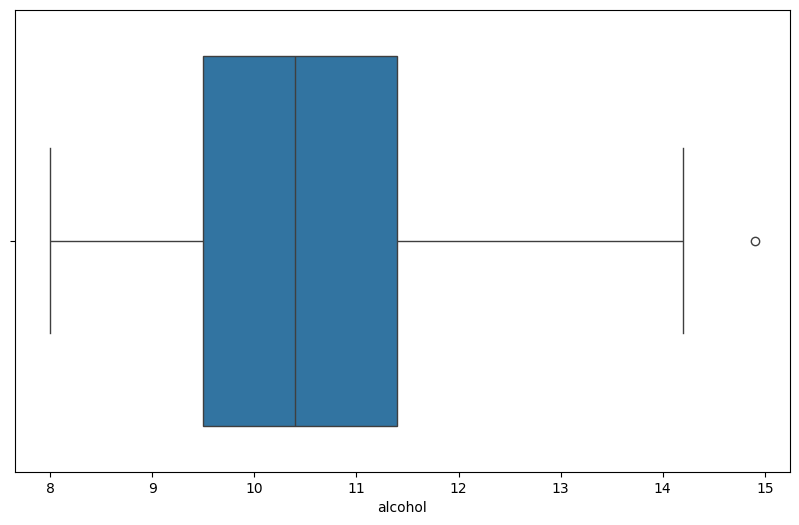

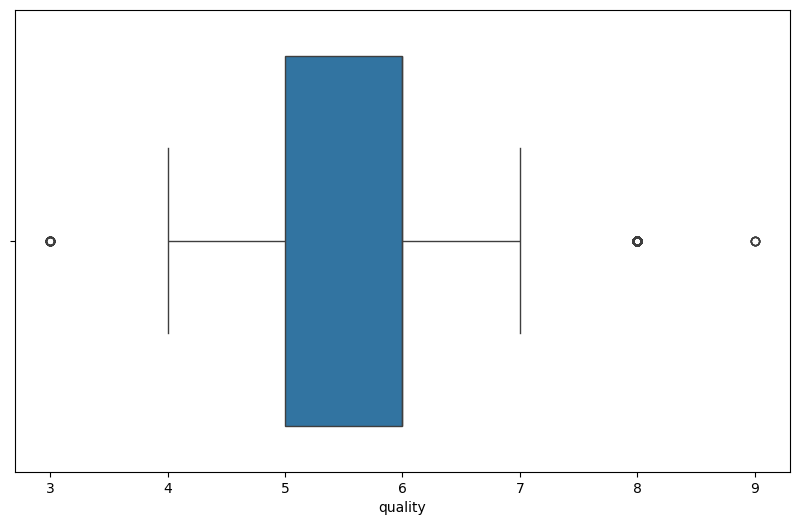

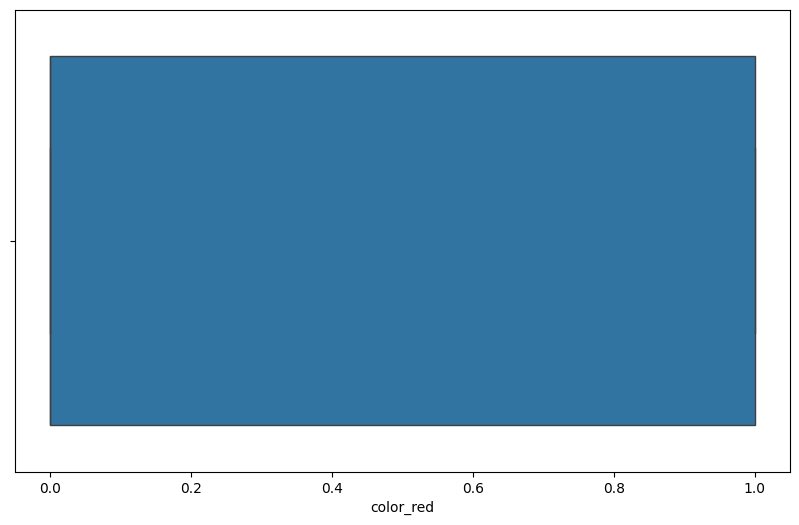

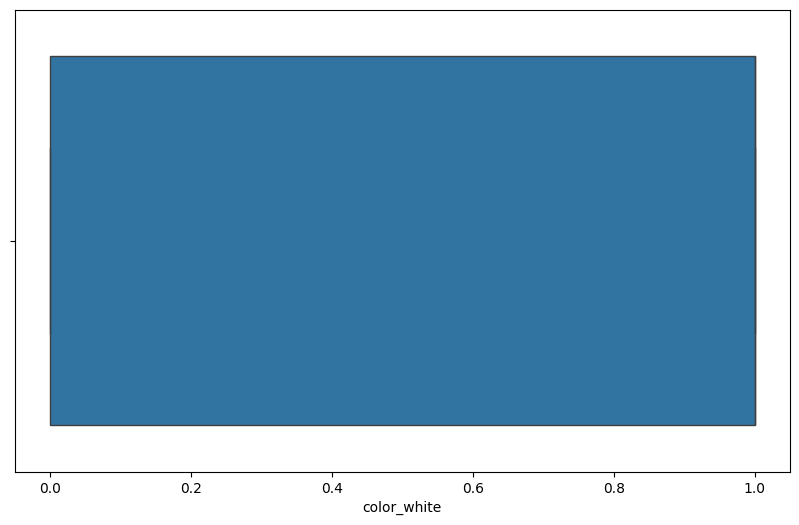

In [10]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=df)
    plt.show()

In [11]:
df = df[(df["volatile acidity"] <= 1.4)]
df = df[(df["citric acid"] <= 1.2)]
df = df[(df["residual sugar"] <= 35)]
df = df[(df["chlorides"] <= 0.5)]
df = df[(df["free sulfur dioxide"] <= 150)]
df = df[(df["total sulfur dioxide"] <= 400)]

[[<Axes: title={'center': 'fixed acidity'}>]]
[[<Axes: title={'center': 'volatile acidity'}>]]
[[<Axes: title={'center': 'citric acid'}>]]
[[<Axes: title={'center': 'residual sugar'}>]]
[[<Axes: title={'center': 'chlorides'}>]]
[[<Axes: title={'center': 'free sulfur dioxide'}>]]
[[<Axes: title={'center': 'total sulfur dioxide'}>]]
[[<Axes: title={'center': 'density'}>]]
[[<Axes: title={'center': 'pH'}>]]
[[<Axes: title={'center': 'sulphates'}>]]
[[<Axes: title={'center': 'alcohol'}>]]
[[<Axes: title={'center': 'quality'}>]]
[[<Axes: title={'center': 'color_red'}>]]
[[<Axes: title={'center': 'color_white'}>]]


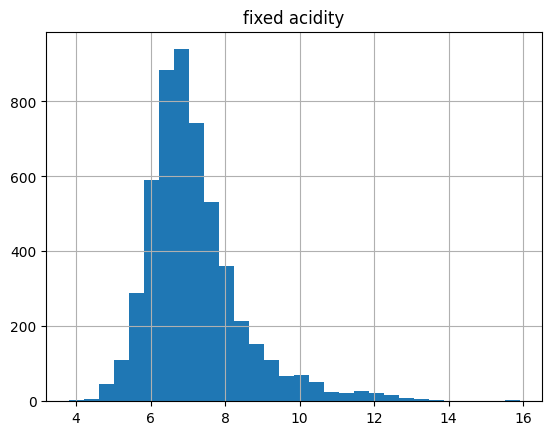

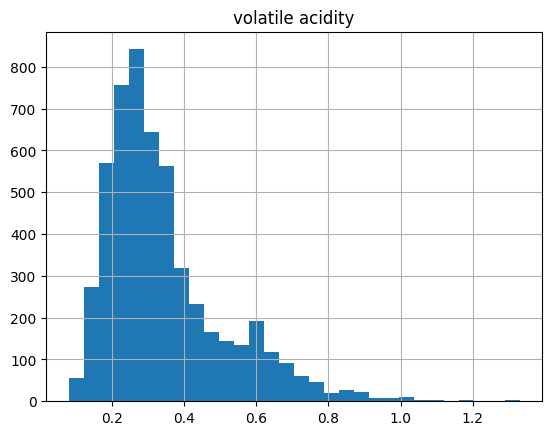

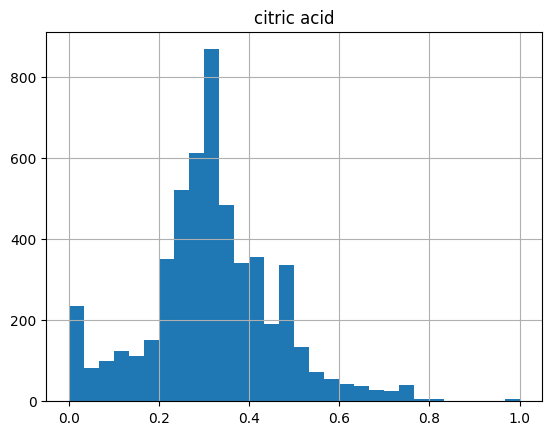

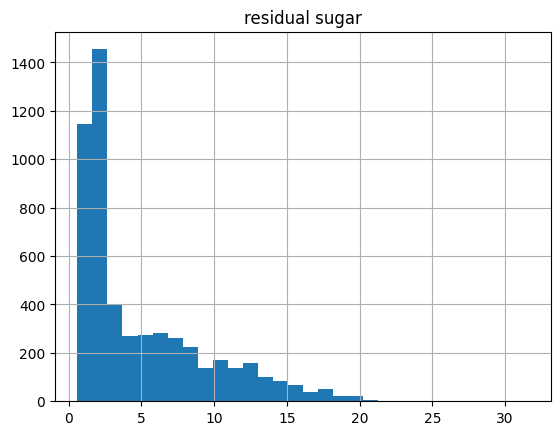

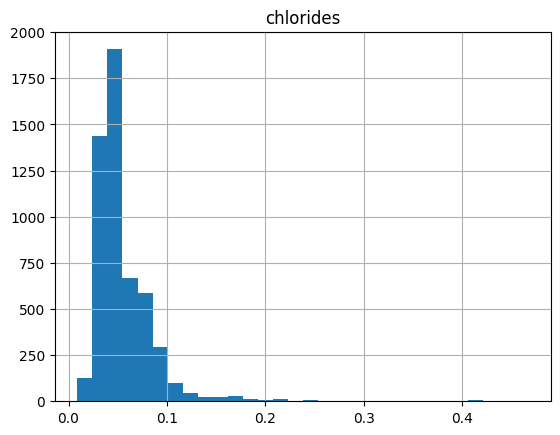

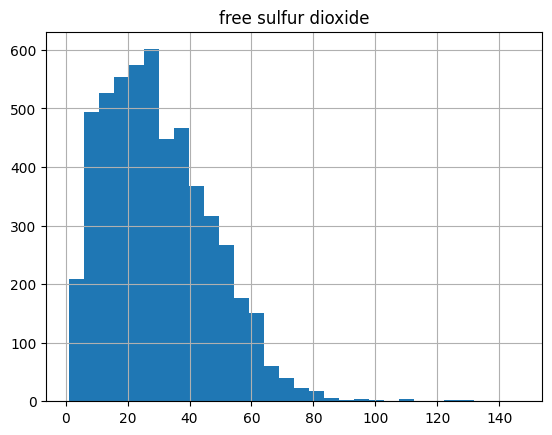

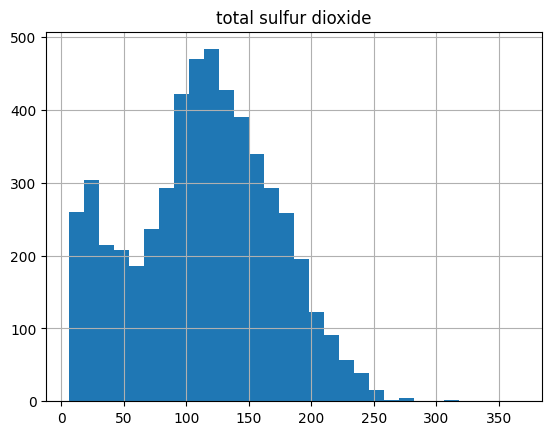

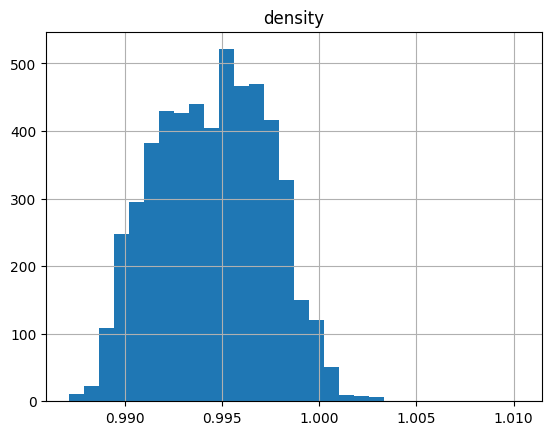

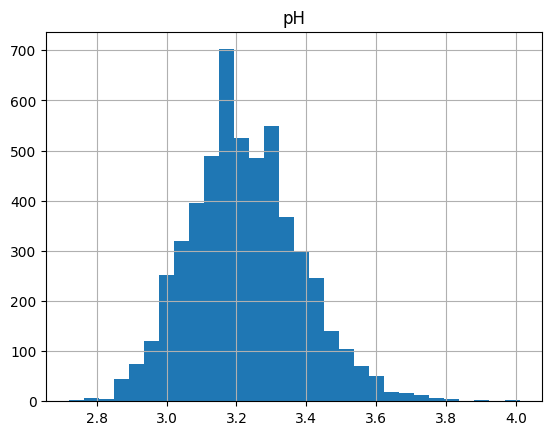

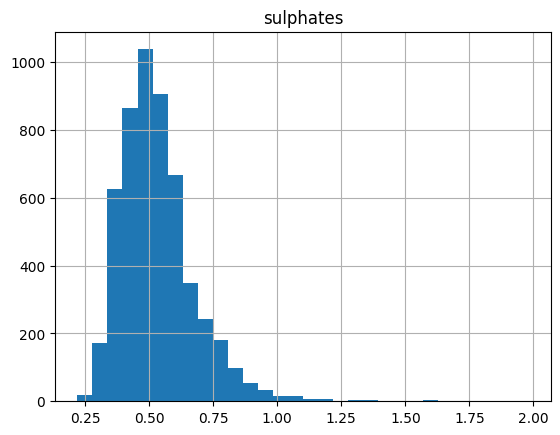

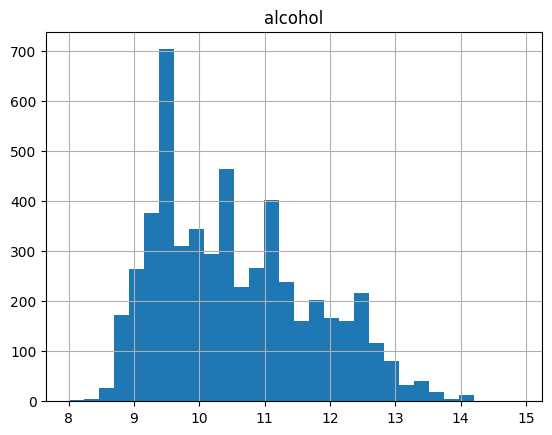

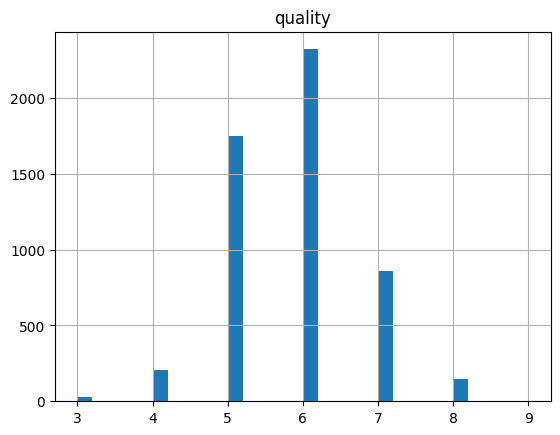

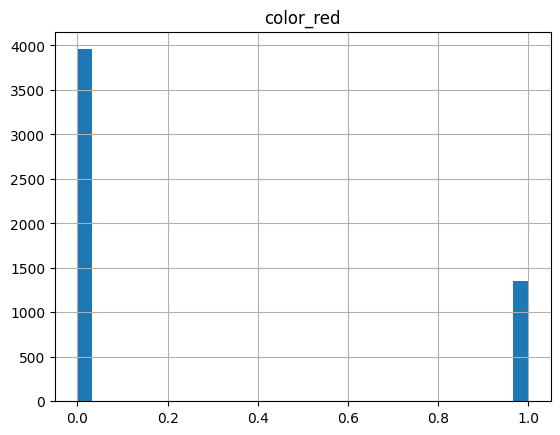

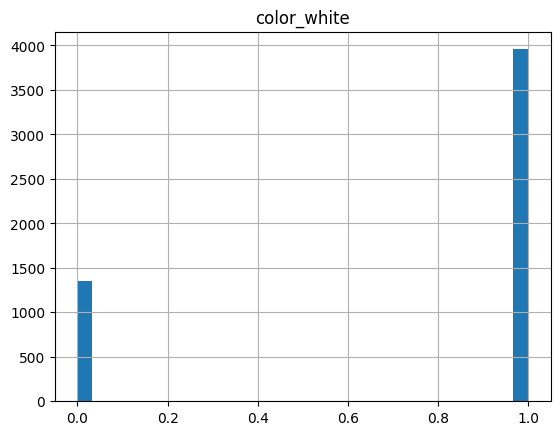

In [12]:
for col in df.columns:
    print(df.hist(col, bins=30))

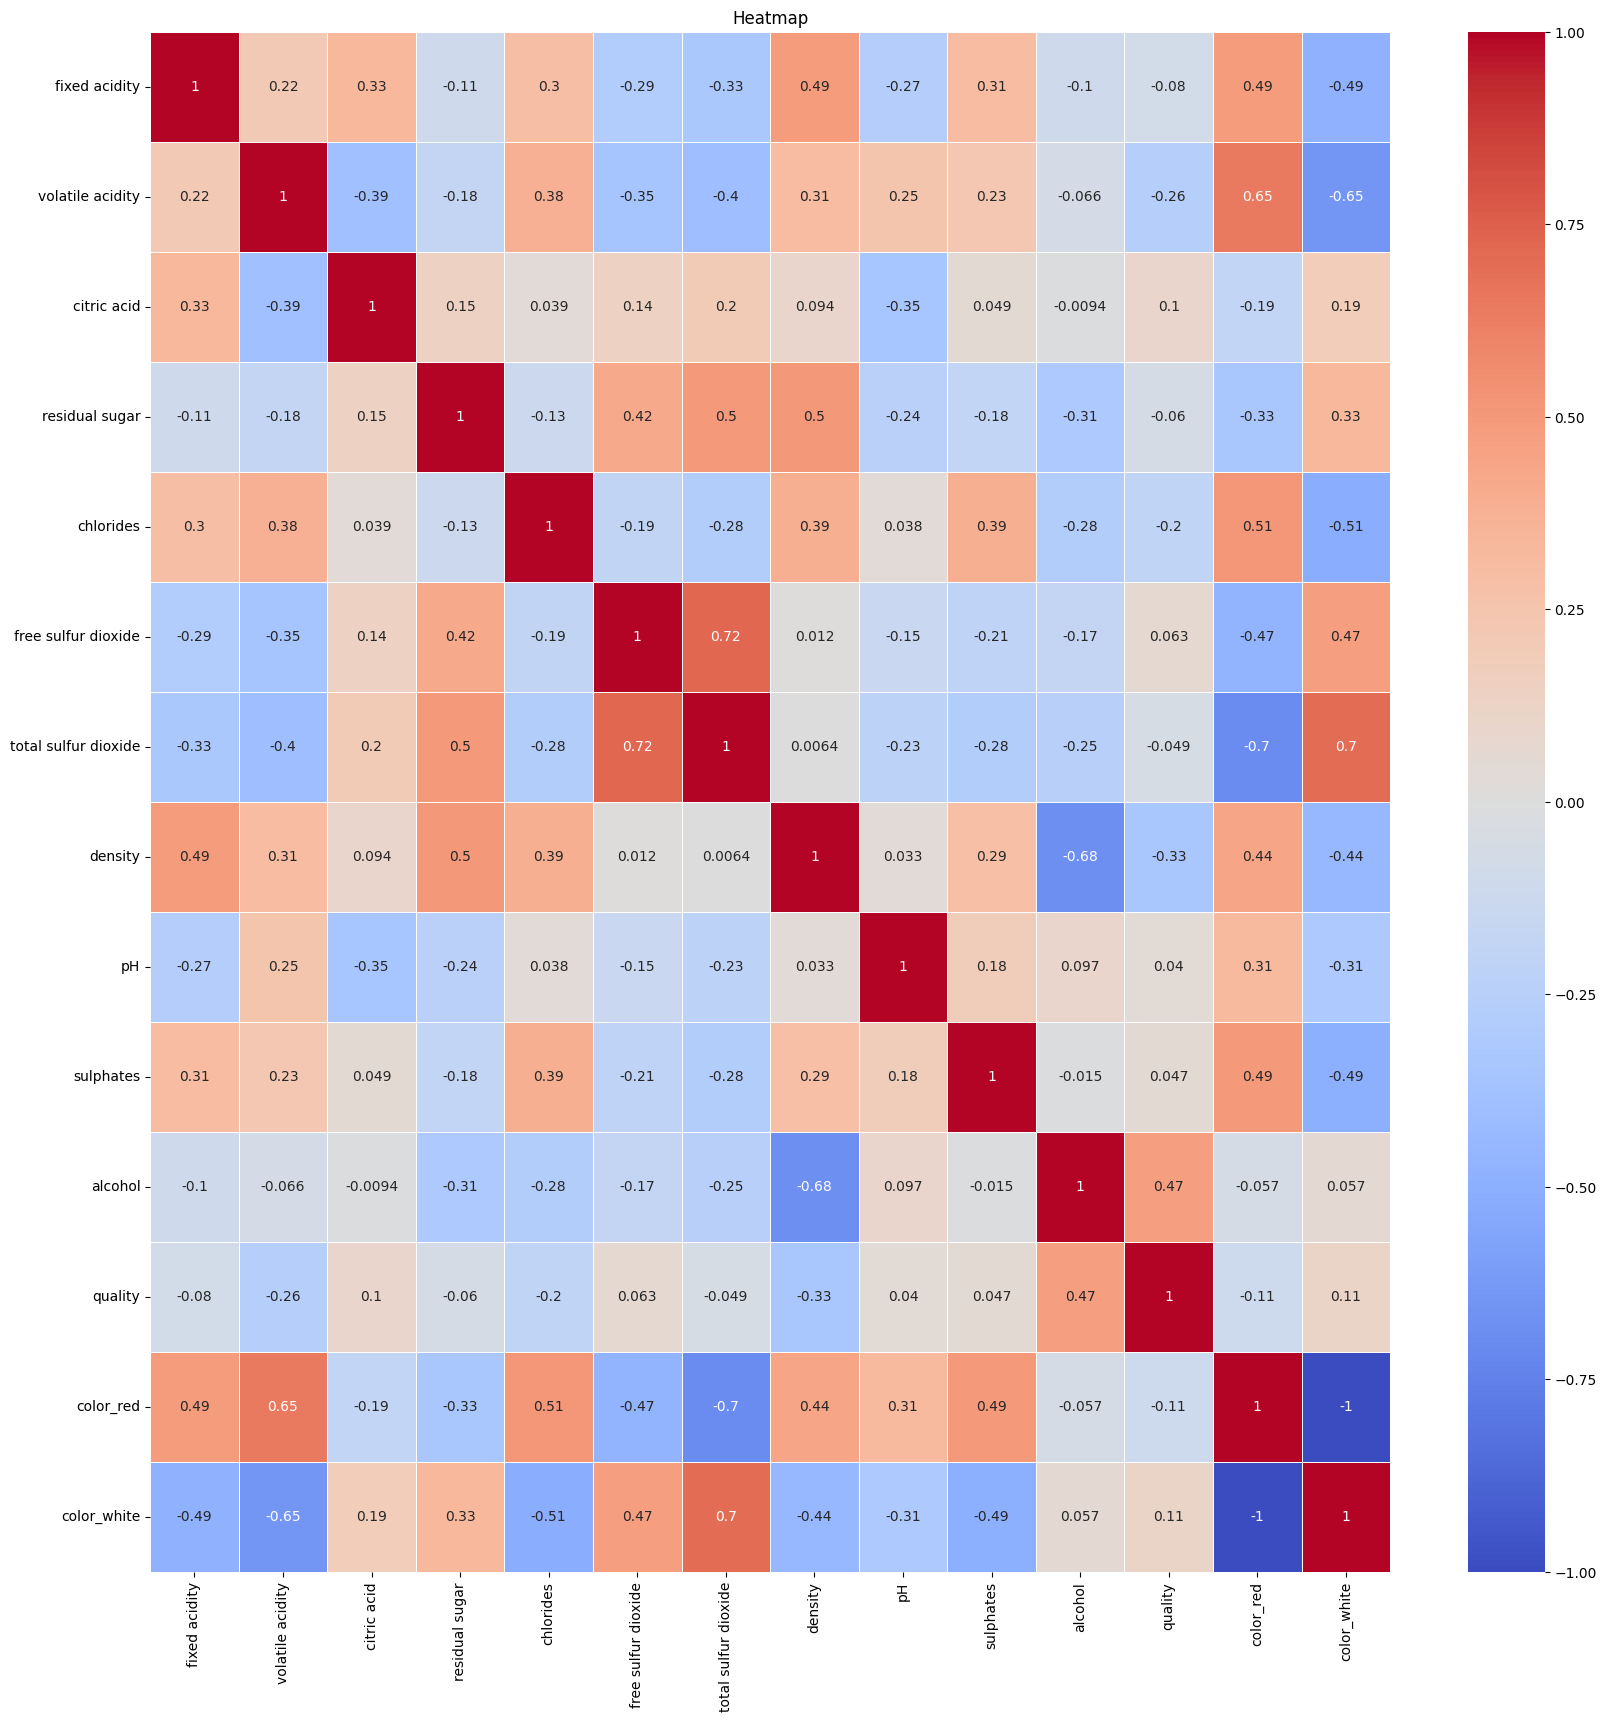

In [13]:
heatmap(df)

In [14]:
df.to_csv(r"..\data\processed_winequality.csv", sep=";", index=False, encoding='utf-8')